In [ ]:
# Step 1 = Library and load data

# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carga de DataSet

from google.colab import files
uploaded= files.upload()
for fn in uploaded.keys():
  name = fn

df_weather = pd.read_csv(name, sep=";")

df_weather



Saving w.csv to w.csv


<ipython-input-1-70e1a340092b>:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv(name, sep=";")


,Date,Location,GeoLocation,RegZone,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,Este de Australia.,Nueva Gales del Sur,13.4,22.9,0.6,NaN,NaN,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,Este de Australia.,Nueva Gales del Sur,7.4,25.1,0.0,NaN,NaN,WNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,Este de Australia.,Nueva Gales del Sur,12.9,25.7,0.0,NaN,NaN,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,Este de Australia.,Nueva Gales del Sur,9.2,28.0,0.0,NaN,NaN,NE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,Este de Australia.,Nueva Gales del Sur,17.5,32.3,1.0,NaN,NaN,W,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,Centro de Australia.,Territorio del Norte,3.5,21.8,0.0,NaN,NaN,E,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,Centro de Australia.,Territorio del Norte,2.8,23.4,0.0,NaN,NaN,E,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,Centro de Australia.,Territorio del Norte,3.6,25.3,0.0,NaN,NaN,NNW,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,Centro de Australia.,Territorio del Norte,5.4,26.9,0.0,NaN,NaN,N,...,24.0,1021,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [ ]:
# Step 2
# Create new columns and replaces string for float64

d_LluviaMan = { 'No': 0, 'Yes': 1}
df_weather['desc_LluviaMan']=df_weather['RainTomorrow'].map(d_LluviaMan)

d_LluviaHoy = { 'No': 0, 'Yes': 1}
df_weather['desc_LluviaHoy']=df_weather['RainToday'].map(d_LluviaHoy)

# Changing type of desc_LLuviaMan to float64

df_weather['desc_LluviaMan'] = df_weather['desc_LluviaMan'].astype(float)

# Creating new columns to keep the og data untouched

df_weather['Evaporacion'] = ''
df_weather['Sol'] = ''
df_weather['Nub9am'] = ''
df_weather['Nub3pm'] = ''
df_weather['Presion9am'] = ''
df_weather['Presion3pm'] = ''
df_weather['Mes'] = ''
df_weather['Anio'] = ''
df_weather['mm'] = ''
df_weather['Humedad9am'] = ''
df_weather['Humedad3pm'] = ''
df_weather['T9am'] = ''
df_weather['T3pm'] = ''


# Copy og data in copy columns

df_weather['Evaporacion'] = df_weather['Evaporation']
df_weather['Sol'] = df_weather['Sunshine']
df_weather['Nub9am'] = df_weather['Cloud9am']
df_weather['Nub3pm'] = df_weather['Cloud3pm']
df_weather['Presion9am'] = df_weather['Pressure9am']
df_weather['Presion3pm'] = df_weather['Pressure3pm']
df_weather['mm'] = df_weather['Rainfall']
df_weather['Humedad9am'] = df_weather['Humidity9am']
df_weather['Humedad3pm'] = df_weather['Humidity3pm']
df_weather['T9am'] = df_weather['Temp9am']
df_weather['T3pm'] = df_weather['Temp3pm']

# Replace Nulls by mode in the copy columns

df_weather['Evaporacion'].fillna(df_weather['Evaporacion'].mode()[0], inplace=True)
df_weather['Sol'].fillna(df_weather['Sol'].mode()[0], inplace=True)
df_weather['Nub9am'].fillna(df_weather['Nub9am'].mode()[0], inplace=True)
df_weather['Nub3pm'].fillna(df_weather['Nub3pm'].mode()[0], inplace=True)
df_weather['Presion9am'].fillna(df_weather['Presion9am'].mode()[0], inplace=True)
df_weather['Presion3pm'].fillna(df_weather['Presion3pm'].mode()[0], inplace=True)
df_weather['desc_LluviaHoy'].fillna(df_weather['desc_LluviaHoy'].mode()[0], inplace=True)
df_weather['mm'].fillna(df_weather['mm'].mode()[0], inplace=True)
df_weather['Humedad9am'].fillna(df_weather['Humedad9am'].mode()[0], inplace=True)
df_weather['Humedad3pm'].fillna(df_weather['Humedad3pm'].mode()[0], inplace=True)
df_weather['T9am'].fillna(df_weather['T9am'].mode()[0], inplace=True)
df_weather['T3pm'].fillna(df_weather['T3pm'].mode()[0], inplace=True)
df_weather['Anio'] = pd.DatetimeIndex(df_weather['Date']).year
df_weather['Mes'] = pd.DatetimeIndex(df_weather['Date']).month

# DF Filtrado
df_filtered = df_weather[~df_weather['Anio'].isin([2007, 2008, 2017])]

# Presion to numeric
df_weather['Presion9am'] = pd.to_numeric(df_weather['Presion9am'], errors='coerce')
df_weather['Presion3pm'] = pd.to_numeric(df_weather['Presion3pm'], errors='coerce')
df_filtered['Presion9am'] = pd.to_numeric(df_filtered['Presion9am'], errors='coerce')
df_filtered['Presion3pm'] = pd.to_numeric(df_filtered['Presion3pm'], errors='coerce')

"""Step 2 - Done"""

<ipython-input-2-17fd26e77c22>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Presion9am'] = pd.to_numeric(df_filtered['Presion9am'], errors='coerce')
<ipython-input-2-17fd26e77c22>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Presion3pm'] = pd.to_numeric(df_filtered['Presion3pm'], errors='coerce')


'Step 2 - Done'

In [ ]:
# Paso 2 - Limpieza de Datos y Llenado
# Creando nuevas columnas y transformando String por float64
d_LluviaMan = { 'No': 0, 'Yes': 1}
df_weather['desc_LluviaMan']=df_weather['RainTomorrow'].map(d_LluviaMan)

d_LluviaHoy = { 'No': 0, 'Yes': 1}
df_weather['desc_LluviaHoy']=df_weather['RainToday'].map(d_LluviaHoy)

# Cambiando el tipo de dato de desc_LLuviaMan a float64
df_weather['desc_LluviaMan'] = df_weather['desc_LluviaMan'].astype(float)

# Creando nuevas columnas para mantener la data original intacta
df_weather['Evaporacion'] = '' # Evaporation [float64]
df_weather['Sol'] = '' # Sunshine [float64]
df_weather['Nub9am'] = '' # Cloud9am [float64]
df_weather['Nub3pm'] = '' # Cloud3pm [float64]
df_weather['Presion9am'] = ''  # Pressure9am [object]
df_weather['Presion3pm'] = ''  # Pressure3pm [object]
df_weather['Lluvia'] = '' # Rainfall [float64] // Ex 'mm'
df_weather['Humedad9am'] = '' # Humidity9am [float64]
df_weather['Humedad3pm'] = '' # Humidity3pm [float64]
df_weather['T9am'] = '' # Temp9am [float64]
df_weather['T3pm'] = '' # Temp3pm [float64]
df_weather['W9am'] = ''  # WindSpeed9am [float64]
df_weather['W3pm'] = '' # WindSpeed3pm [float64]
df_weather['WGS'] = '' # WindGustSpeed [float64]
df_weather['WD9am'] = '' # WindDir9am [object]
df_weather['WD3pm'] = '' # WindDir3pm [object]
df_weather['Riesgo'] = '' # RISK_MM [float64]
df_weather['Minima_temp'] = '' # MinTemp [float64]
df_weather['Max_temp'] = '' # MaxTemp [float64]
df_weather['Dir_viento'] = '' # WindGustDir [object]
df_weather['Mes'] = ''
df_weather['Anio'] = ''


# Copiando data original(data raw) a columnas copia
df_weather['Evaporacion'] = df_weather['Evaporation']
df_weather['Sol'] = df_weather['Sunshine']
df_weather['Nub9am'] = df_weather['Cloud9am']
df_weather['Nub3pm'] = df_weather['Cloud3pm']
df_weather['Presion9am'] = df_weather['Pressure9am']
df_weather['Presion3pm'] = df_weather['Pressure3pm']
df_weather['Lluvia'] = df_weather['Rainfall']
df_weather['Humedad9am'] = df_weather['Humidity9am']
df_weather['Humedad3pm'] = df_weather['Humidity3pm']
df_weather['T9am'] = df_weather['Temp9am']
df_weather['T3pm'] = df_weather['Temp3pm']
df_weather['WGS'] = df_weather['WindGustSpeed']
df_weather['W9am'] = df_weather['WindSpeed9am']
df_weather['W3pm'] = df_weather['WindSpeed3pm']
df_weather['WD9am'] = df_weather['WindDir9am']
df_weather['WD3pm'] = df_weather['WindDir3pm']
df_weather['Riesgo'] = df_weather['RISK_MM']
df_weather['Minima_temp'] = df_weather['MinTemp']
df_weather['Max_temp'] = df_weather['MaxTemp']
df_weather['Dir_viento'] = df_weather['WindGustDir']


# Transformando Presión a tipo numeric
df_weather['Presion9am'] = pd.to_numeric(df_weather['Presion9am'], errors='coerce')
df_weather['Presion3pm'] = pd.to_numeric(df_weather['Presion3pm'], errors='coerce')

# Reemplazando los valores nulos por la moda y el promedio respectivamente en las columnas copia
df_weather['Evaporacion'].fillna(df_weather['Evaporacion'].mean(), inplace=True)
df_weather['Sol'].fillna(df_weather['Sol'].mean(), inplace=True)
df_weather['Nub9am'].fillna(df_weather['Nub9am'].mean(), inplace=True)
df_weather['Nub3pm'].fillna(df_weather['Nub3pm'].mean(), inplace=True)
df_weather['Presion9am'].fillna(df_weather['Presion9am'].mean(), inplace=True)
df_weather['Presion3pm'].fillna(df_weather['Presion3pm'].mean(), inplace=True)
df_weather['desc_LluviaHoy'].fillna(df_weather['desc_LluviaHoy'].mode()[0], inplace=True)
df_weather['Lluvia'].fillna(df_weather['Lluvia'].mean(), inplace=True)
df_weather['Humedad9am'].fillna(df_weather['Humedad9am'].mean(), inplace=True)
df_weather['Humedad3pm'].fillna(df_weather['Humedad3pm'].mean(), inplace=True)
df_weather['T9am'].fillna(df_weather['T9am'].mean(), inplace=True)
df_weather['T3pm'].fillna(df_weather['T3pm'].mean(), inplace=True)
df_weather['WGS'].fillna(df_weather['WGS'].mean(), inplace=True)
df_weather['W9am'].fillna(df_weather['W9am'].mean(), inplace=True)
df_weather['W3pm'].fillna(df_weather['W3pm'].mean(), inplace=True)
df_weather['WD9am'].fillna(df_weather['WD9am'].mode()[0], inplace=True)
df_weather['WD3pm'].fillna(df_weather['WD3pm'].mode()[0], inplace=True)
df_weather['Riesgo'].fillna(df_weather['Riesgo'].mean(), inplace=True)
df_weather['Minima_temp'].fillna(df_weather['Minima_temp'].mean(), inplace=True)
df_weather['Max_temp'].fillna(df_weather['Max_temp'].mean(), inplace=True)
df_weather['Dir_viento'].fillna(df_weather['Dir_viento'].mode()[0], inplace=True)
df_weather['Anio'] = pd.DatetimeIndex(df_weather['Date']).year
df_weather['Mes'] = pd.DatetimeIndex(df_weather['Date']).month


df_weather

"""Paso 2 - Listo"""

'Paso 2 - Listo'

In [ ]:
# Agrupando columnas necesarias
columnas = ['Date', 'Location', 'GeoLocation', 'RegZone','Evaporacion', 'Sol', 'Nub9am', 'Nub3pm', 'Presion9am', 'Presion3pm', 'Lluvia', 'Humedad9am', 'Humedad3pm', 'T9am', 'T3pm', 'W9am', 'W3pm', 'WGS', 'WD9am', 'WD3pm', 'Riesgo', 'Minima_temp', 'Max_temp', 'Dir_viento', 'Mes', 'Anio', 'desc_LluviaMan', 'desc_LluviaHoy']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_final = df_weather[columnas].copy()

In [ ]:
# Step 3 - Show DF

df_weather

,Date,Location,GeoLocation,RegZone,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Nub3pm,Presion9am,Presion3pm,Mes,Anio,mm,Humedad9am,Humedad3pm,T9am,T3pm
0,2008-12-01,Albury,Este de Australia.,Nueva Gales del Sur,13.4,22.9,0.6,NaN,NaN,W,...,7.0,1007.7,1007.1,12,2008,0.6,71.0,22.0,16.9,21.8
1,2008-12-02,Albury,Este de Australia.,Nueva Gales del Sur,7.4,25.1,0.0,NaN,NaN,WNW,...,7.0,1010.6,1007.8,12,2008,0.0,44.0,25.0,17.2,24.3
2,2008-12-03,Albury,Este de Australia.,Nueva Gales del Sur,12.9,25.7,0.0,NaN,NaN,WSW,...,2.0,1007.6,1008.7,12,2008,0.0,38.0,30.0,21.0,23.2
3,2008-12-04,Albury,Este de Australia.,Nueva Gales del Sur,9.2,28.0,0.0,NaN,NaN,NE,...,7.0,1017.6,1012.8,12,2008,0.0,45.0,16.0,18.1,26.5
4,2008-12-05,Albury,Este de Australia.,Nueva Gales del Sur,17.5,32.3,1.0,NaN,NaN,W,...,8.0,1010.8,1006,12,2008,1.0,82.0,33.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,Centro de Australia.,Territorio del Norte,3.5,21.8,0.0,NaN,NaN,E,...,7.0,1024.7,1021.2,6,2017,0.0,59.0,27.0,9.4,20.9
142189,2017-06-21,Uluru,Centro de Australia.,Territorio del Norte,2.8,23.4,0.0,NaN,NaN,E,...,7.0,1024.6,1020.3,6,2017,0.0,51.0,24.0,10.1,22.4
142190,2017-06-22,Uluru,Centro de Australia.,Territorio del Norte,3.6,25.3,0.0,NaN,NaN,NNW,...,7.0,1023.5,1019.1,6,2017,0.0,56.0,21.0,10.9,24.5
142191,2017-06-23,Uluru,Centro de Australia.,Territorio del Norte,5.4,26.9,0.0,NaN,NaN,N,...,7.0,1021,1016.8,6,2017,0.0,53.0,24.0,12.5,26.1


In [ ]:
# Step 4 - DF types

df_weather.dtypes

Date               object
Location           object
GeoLocation        object
RegZone            object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir        object
WindGustSpeed     float64
WindDir9am         object
WindDir3pm         object
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am        object
Pressure3pm        object
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday          object
RISK_MM           float64
RainTomorrow       object
desc_LluviaMan    float64
desc_LluviaHoy    float64
Evaporacion       float64
Sol               float64
Nub9am            float64
Nub3pm            float64
Presion9am         object
Presion3pm         object
Mes                 int64
Anio                int64
mm                float64
Humedad9am        float64
Humedad3pm  

In [ ]:
# Hallazgo 1 - Niño y Niña

def llenardf(a,b):
  df1 = df_weather.loc[df_weather[b] == a]
  df = pd.DataFrame()
  i = 0
  for i in range (2009,2017):
    df11 = df1.loc[df1['Anio'] == i]
    df_prueba = df11.groupby(['Anio', 'Mes'])['mm'].agg(['max', 'min', 'mean', 'sum']).reset_index().rename(columns={'max': 'max_rainfall', 'min': 'min_rainfall', 'mean': 'mean_rainfall', 'sum': 'suma_Rainfall'})
    max_rainfall_sum = df_prueba['suma_Rainfall'].max()
    mean_rainfall_sum = df_prueba['suma_Rainfall'].mean()
    df_prueba['max_rainfall'] = max_rainfall_sum
    df_prueba['min_rainfall'] = df_prueba['suma_Rainfall'].min()
    df_prueba['mean_rainfall'] = mean_rainfall_sum
    df = pd.concat([df,df_prueba], ignore_index=True)
    df11 = df1
  df_prueba = pd.DataFrame()
  return df

# Main()
df_Brisbane, df_SalmonGums, df_Queens, df_AO = [], [], [], []
print("Bienvenido")
while True:
    entry = input("""Ingrese [1] si desea LLENAR los DataFrames, [0] si desea SALIR """)
    print("")
    try:
        op = int(entry)
        if op == 1:
            df_Brisbane = llenardf('Brisbane','Location')
            df_SalmonGums = llenardf('SalmonGums','Location')
            df_Queens = llenardf('Queensland', 'RegZone')
            df_AO = llenardf('Australia Occidental', 'RegZone')
            print("DataFrames llenados con exito!")
            break
        elif op == 0:
          print("Muchas Gracias")
          break
        else:
            print("Opción no válida. Ingrese una opción correcta.")
            continue
    except ValueError:
        print("Entrada no válida. Por favor, ingrese un número entero.")




Bienvenido
Ingrese [1] si desea LLENAR los DataFrames, [0] si desea SALIR 1

DataFrames llenados con exito!


In [ ]:
# Comprobando DataFrame Brisbane
df_Brisbane

,Anio,Mes,max_rainfall,min_rainfall,mean_rainfall,suma_Rainfall
0,2009,1,240.8,3.6,89.10,74.2
1,2009,2,240.8,3.6,89.10,131.8
2,2009,3,240.8,3.6,89.10,47.6
3,2009,4,240.8,3.6,89.10,195.2
4,2009,5,240.8,3.6,89.10,240.8
...,...,...,...,...,...,...
88,2016,8,264.8,12.8,61.35,31.6
89,2016,9,264.8,12.8,61.35,51.8
90,2016,10,264.8,12.8,61.35,30.2
91,2016,11,264.8,12.8,61.35,28.0


In [ ]:
# Comprobando DataFrame SalmonGums
df_SalmonGums

,Anio,Mes,max_rainfall,min_rainfall,mean_rainfall,suma_Rainfall
0,2009,1,113.2,0.4,26.683333,113.2
1,2009,2,113.2,0.4,26.683333,1.8
2,2009,3,113.2,0.4,26.683333,0.4
3,2009,4,113.2,0.4,26.683333,0.4
4,2009,5,113.2,0.4,26.683333,1.6
...,...,...,...,...,...,...
88,2016,8,57.2,3.4,31.316667,53.6
89,2016,9,57.2,3.4,31.316667,27.0
90,2016,10,57.2,3.4,31.316667,11.6
91,2016,11,57.2,3.4,31.316667,3.4


In [ ]:
# Comprobando DF Queensland
df_Queens

,Anio,Mes,max_rainfall,min_rainfall,mean_rainfall,suma_Rainfall
0,2009,1,1880.0,16.0,543.650000,1689.2
1,2009,2,1880.0,16.0,543.650000,1880.0
2,2009,3,1880.0,16.0,543.650000,309.8
3,2009,4,1880.0,16.0,543.650000,766.2
4,2009,5,1880.0,16.0,543.650000,517.8
...,...,...,...,...,...,...
88,2016,8,972.0,82.4,318.666667,159.4
89,2016,9,972.0,82.4,318.666667,137.0
90,2016,10,972.0,82.4,318.666667,123.4
91,2016,11,972.0,82.4,318.666667,82.4


In [ ]:
# Comprobando DF Australia Occidental
df_AO

,Anio,Mes,max_rainfall,min_rainfall,mean_rainfall,suma_Rainfall
0,2009,1,1152.2,16.4,407.383333,153.6
1,2009,2,1152.2,16.4,407.383333,69.2
2,2009,3,1152.2,16.4,407.383333,142.2
3,2009,4,1152.2,16.4,407.383333,69.2
4,2009,5,1152.2,16.4,407.383333,400.0
...,...,...,...,...,...,...
88,2016,8,974.5,89.3,485.458333,974.5
89,2016,9,974.5,89.3,485.458333,571.8
90,2016,10,974.5,89.3,485.458333,348.0
91,2016,11,974.5,89.3,485.458333,93.2


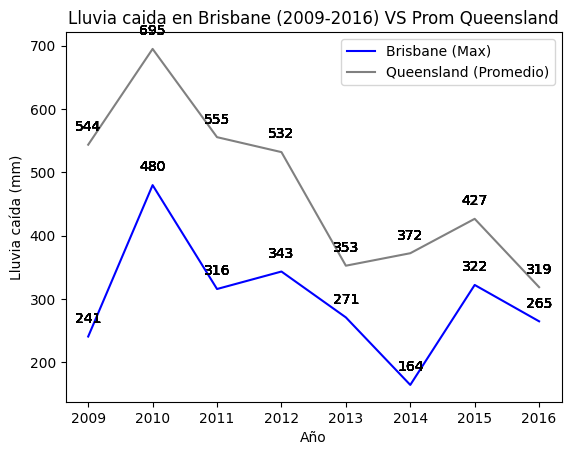

In [ ]:
# Brisbane
# Graficar la suma, el promedio y los datos
plt.plot(df_Brisbane['Anio'], round(df_Brisbane['max_rainfall'], 1), color='blue', label="Brisbane (Max)")
plt.plot(df_Queens['Anio'], round(df_Queens['mean_rainfall'], 1), color='gray', label="Queensland (Promedio)")

# Agregar los valores al gráfico para la línea de Brisbane
for i, val in enumerate(df_Brisbane['max_rainfall']):
    plt.annotate(str(round(val)), xy=(df_Brisbane['Anio'][i], val), textcoords="offset points", xytext=(0,10), ha='center')


# Agregar los valores al gráfico para la línea de Queensland
for i, val in enumerate(df_Queens['mean_rainfall']):
    plt.annotate(str(round(val)), xy=(df_Queens['Anio'][i], val), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Año')
plt.ylabel('Lluvia caída (mm)')
plt.title('Lluvia caida en Brisbane (2009-2016) VS Prom Queensland')
plt.legend()
plt.show()

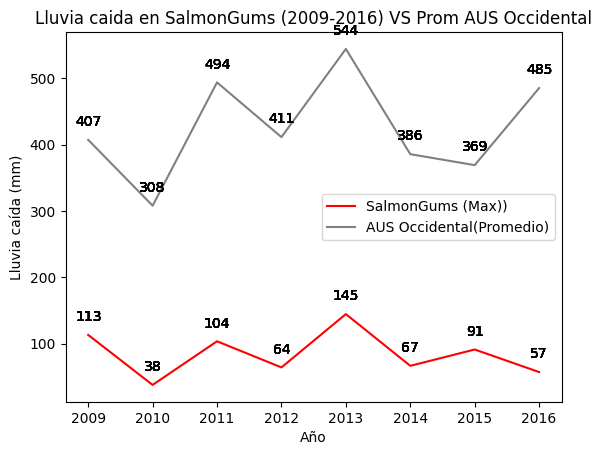

In [ ]:
# SalmonGums
# Graficar la suma, el promedio y los datos
plt.plot(df_SalmonGums['Anio'], df_SalmonGums['max_rainfall'], color='red', label="SalmonGums (Max))")
plt.plot(df_AO['Anio'], df_AO['mean_rainfall'], color='gray', label="AUS Occidental(Promedio)")

# Agregar los valores al gráfico para la línea de Brisbane
for i, val in enumerate(df_SalmonGums['max_rainfall']):
    plt.annotate(str(round(val)), xy=(df_Brisbane['Anio'][i], val), textcoords="offset points", xytext=(0,10), ha='center')


# Agregar los valores al gráfico para la línea de Queensland
for i, val in enumerate(df_AO['mean_rainfall']):
    plt.annotate(str(round(val)), xy=(df_Queens['Anio'][i], val), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Año')
plt.ylabel('Lluvia caída (mm)')
plt.title('Lluvia caida en SalmonGums (2009-2016) VS Prom AUS Occidental')
plt.legend()
plt.show()

In [ ]:
# Hallazgo 2 - Presion 9am y Presion3pm
df_filtered = df_weather[~df_weather['Anio'].isin([2007, 2008, 2017])]
df_coast = df_filtered.loc[(df_filtered['Location'] == 'Adelaide') | (df_filtered['Location'] == 'Portland') | (df_filtered['Location'] == 'Gold Coast') | (df_filtered['Location'] == 'Hobart') | (df_filtered['Location'] == 'Perth') | (df_filtered['Location'] == 'Mount Gambier') | (df_filtered['Location'] == 'Melbourne') | (df_filtered['Location'] == 'Sydney') | (df_filtered['Location'] == 'Wollongong') | (df_filtered['Location'] == 'Coffs Harbour') | (df_filtered['Location'] == 'Cairns') | (df_filtered['Location'] == 'Newcastle')]
df_coast2 = df_coast.loc[(df_coast['Mes'].isin([1, 2, 12]))]



In [ ]:
# Filtrar las locaciones requeridas
df_coast2 = df_coast2.loc[df_coast2['Location'].isin(['Adelaide', 'Portland', 'Gold Coast', 'Hobart', 'Perth', 'Mount Gambier', 'Melbourne', 'Sydney', 'Wollongong', 'Coffs Harbour', 'Cairns', 'Newcastle'])]

# Filtrar las presiones mayores o iguales a 1019
df_coast2 = df_coast2.loc[(df_coast2['Presion9am'] > 1020) | (df_coast2['Presion3pm'] > 1020)]

df_coast9am = df_coast2.loc[:, ['Anio', 'Mes', 'RegZone', 'Location', 'Presion9am', 'Temp9am']]
df_coast3pm = df_coast2.loc[:, ['Anio', 'Mes', 'RegZone', 'Location', 'Presion3pm', 'Temp3pm']]


In [ ]:
# Creacion de los dataframes de Hobart
df_hob = df_coast9am.loc[df_coast9am['Location'] == 'Hobart']
df_hob = df_hob.loc[df_hob['Presion9am'] >= 1020]
df_ene = df_hob.loc[df_hob['Mes'] == 1]

df_hob2 = df_coast3pm.loc[df_coast3pm['Location'] == 'Hobart']
df_hob2 = df_hob2.loc[df_hob2['Presion3pm'] >= 1020]
df_ene2 = df_hob2.loc[df_hob2['Mes'] == 1]

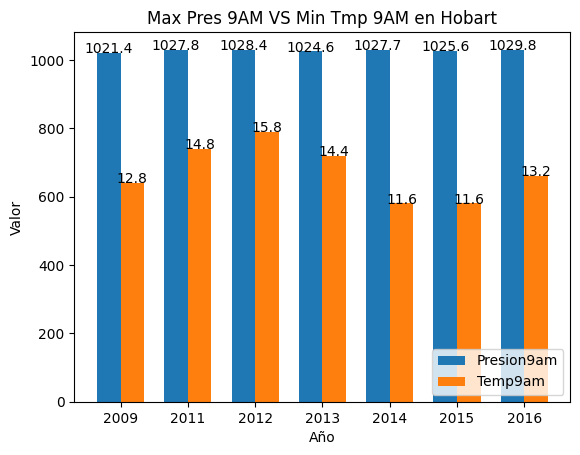

In [ ]:
# Max Pres 9AM VS Min Tmp 9AM en Hobart - Barras

# Configurar el gráfico
anios = df_ene['Anio'].unique()
presiones = df_ene.groupby('Anio')['Presion9am'].max()
temperaturas = df_ene.groupby('Anio')['Temp9am'].min() * 50 # Escalar la temperatura
indice = np.arange(len(anios))
ancho = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(indice - ancho/2, presiones, ancho, label='Presion9am')
rects2 = ax.bar(indice + ancho/2, temperaturas, ancho, label='Temp9am')

# Agregar etiquetas con los valores de Temp9am
for i, temp in enumerate(temperaturas):
    ax.annotate(str(round(temp/50, 1)), xy=(indice[i] + ancho/2, temp + 0.5), ha='center')
for i, pres in enumerate(presiones):
    ax.annotate(str(round(pres, 1)), xy=(indice[i] - ancho/2, pres + 0.5), ha='center')

# Configurar los ejes
ax.set_xlabel('Año')
ax.set_ylabel('Valor')
ax.set_title('Max Pres 9AM VS Min Tmp 9AM en Hobart')
ax.set_xticks(indice)
ax.set_xticklabels(anios)
# Mover la leyenda hacia el costado inferior derecho
ax.legend(loc='lower right')

# Mostrar el gráfico
plt.show()


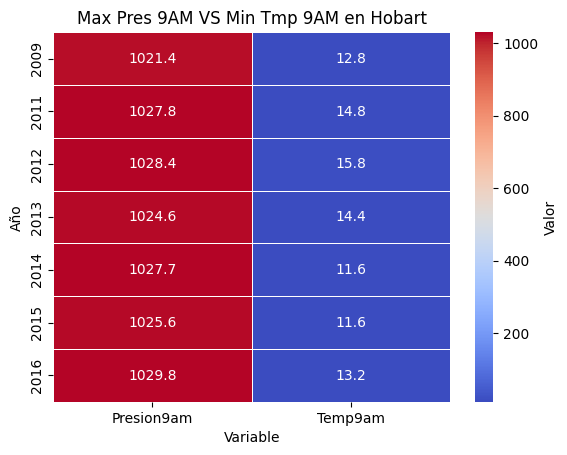

In [ ]:
# Max Pres 9AM VS Min Tmp 9AM en Hobart - Termico

# Crear un dataframe con los datos de presión y temperatura
data = df_ene.pivot_table(index='Anio', values=['Presion9am', 'Temp9am'], aggfunc={'Presion9am': 'max', 'Temp9am': 'min'})

# Crear el mapa de calor
sns.heatmap(data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5, cbar_kws={'label': 'Valor'})

# Configurar los ejes
plt.xlabel('Variable')
plt.ylabel('Año')
plt.title('Max Pres 9AM VS Min Tmp 9AM en Hobart')

# Mostrar el mapa de calor
plt.show()

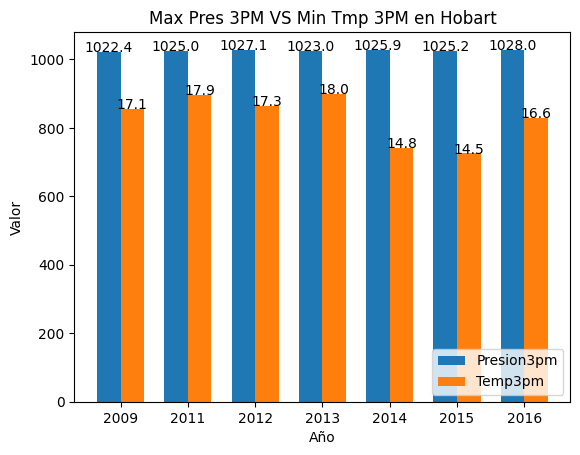

In [ ]:
# Max Pres 3PM VS Min Tmp 3PM en Hobart - Barras

# Configurar el gráfico
anios = df_ene2['Anio'].unique()
presiones = df_ene2.groupby('Anio')['Presion3pm'].max()
temperaturas = df_ene2.groupby('Anio')['Temp3pm'].min() * 50 # Escalar la temperatura
indice = np.arange(len(anios))
ancho = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(indice - ancho/2, presiones, ancho, label='Presion3pm')
rects2 = ax.bar(indice + ancho/2, temperaturas, ancho, label='Temp3pm')

# Agregar etiquetas con los valores de Temp3pm y Presion3pm
for i, temp in enumerate(temperaturas):
    ax.annotate(str(round(temp/50, 1)), xy=(indice[i] + ancho/2, temp + 0.5), ha='center')
for i, pres in enumerate(presiones):
    ax.annotate(str(round(pres, 1)), xy=(indice[i] - ancho/2, pres + 0.5), ha='center')

# Configurar los ejes
ax.set_xlabel('Año')
ax.set_ylabel('Valor')
ax.set_title('Max Pres 3PM VS Min Tmp 3PM en Hobart')
ax.set_xticks(indice)
ax.set_xticklabels(anios)
# Mover la leyenda hacia el costado inferior derecho
ax.legend(loc='lower right')

# Mostrar el gráfico
plt.show()


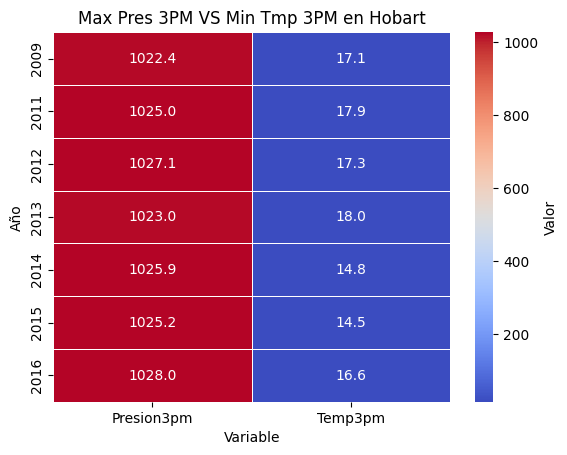

In [ ]:
# Max Pres 3PM VS Min Tmp 3PM en Hobart - Termico
# Crear un dataframe con los datos de presión y temperatura
data = df_ene2.pivot_table(index='Anio', values=['Presion3pm', 'Temp3pm'], aggfunc={'Presion3pm': 'max', 'Temp3pm': 'min'})

# Crear el mapa de calor
sns.heatmap(data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5, cbar_kws={'label': 'Valor'})

# Configurar los ejes
plt.xlabel('Variable')
plt.ylabel('Año')
plt.title('Max Pres 3PM VS Min Tmp 3PM en Hobart')

# Mostrar el mapa de calor
plt.show()

In [ ]:
# Hallazgo 3 Creacion de Data Frames

df_h3 = df_filtered.loc[:, ['Anio', 'Mes','Location', 'RegZone', 'Presion9am', 'T9am', 'WindGustSpeed' ]] #DF con las columnas necesarias
df_hobby = df_h3.loc[df_h3['Location'] == 'Hobart'] # DF exclusivo de la locacion Hobart
df_tas = df_h3.loc[df_h3['Location'] == 'Launceston'] # DF Exclusivo de la locacion Launceston





In [ ]:
# Presion y Temperatura den Hobart
df_hMW = df_hobby.groupby(['Anio'])['WindGustSpeed'].max()
df_hMT = df_tas.groupby('Anio')['WindGustSpeed'].max()
# Presion y Temperatura en LAuceston
df_hMinP = df_hobby.groupby(['Anio'])['Presion9am'].min()
df_hML = df_tas.groupby('Anio')['Presion9am'].max()


In [ ]:
# Transformando la presion de los DF a Numeric para asi poder trabajarlas
df_hobby['Presion9am'] = pd.to_numeric(df_hobby['Presion9am'], errors='coerce')
df_tas['Presion9am'] = pd.to_numeric(df_tas['Presion9am'], errors='coerce')

<ipython-input-106-5fd2f29e2bb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hobby['Presion9am'] = pd.to_numeric(df_hobby['Presion9am'], errors='coerce')
<ipython-input-106-5fd2f29e2bb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tas['Presion9am'] = pd.to_numeric(df_tas['Presion9am'], errors='coerce')


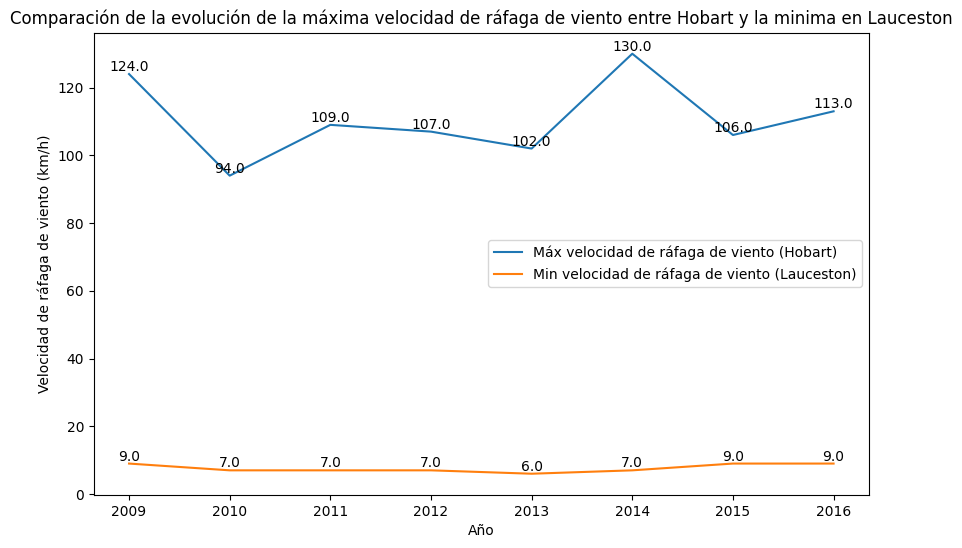

In [ ]:
# Grafico 1 - Max velocidad de rafaga Hobart vs Min  velocidad de rafaga Lauceston
df_hMW = df_hobby.groupby(['Anio'])['WindGustSpeed'].max()
df_hMT = df_tas.groupby(['Anio'])['WindGustSpeed'].min()

plt.figure(figsize=(10,6))

plt.plot(df_hMW.index, df_hMW.values, label='Máx velocidad de ráfaga de viento (Hobart)')
plt.plot(df_hMT.index, df_hMT.values, label='Min velocidad de ráfaga de viento (Lauceston)')

plt.title('Comparación de la evolución de la máxima velocidad de ráfaga de viento entre Hobart y la minima en Lauceston')
plt.xlabel('Año')
plt.ylabel('Velocidad de ráfaga de viento (km/h)')
plt.legend()

# Agregar valores de los puntos
for i, j in zip(df_hMW.index, df_hMW.values):
    plt.text(i, j, str(j), ha='center', va='bottom', fontsize=10)

for i, j in zip(df_hMT.index, df_hMT.values):
    plt.text(i, j, str(j), ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
#
df_hMW = df_hobby.groupby(['Anio'])['WindGustSpeed'].max()
df_hMT = df_tas.groupby(['Anio'])['WindGustSpeed'].max()

plt.figure(figsize=(10,6))

plt.plot(df_hMW.index, df_hMW.values, label='Máx velocidad de ráfaga de viento (Hobart)')
plt.plot(df_hMT.index, df_hMT.values, label='Máx velocidad de ráfaga de viento (Lauceston)')

plt.title('Comparación de la evolución de la máxima velocidad de ráfaga de viento entre Hobart y Lauceston')
plt.xlabel('Año')
plt.ylabel('Velocidad de ráfaga de viento (km/h)')
plt.legend()

# Agregar valores de los puntos
for i, j in zip(df_hMW.index, df_hMW.values):
    plt.text(i, j, str(j), ha='center', va='bottom', fontsize=10)

for i, j in zip(df_hMT.index, df_hMT.values):
    plt.text(i, j, str(j), ha='center', va='bottom', fontsize=10)

plt.show()

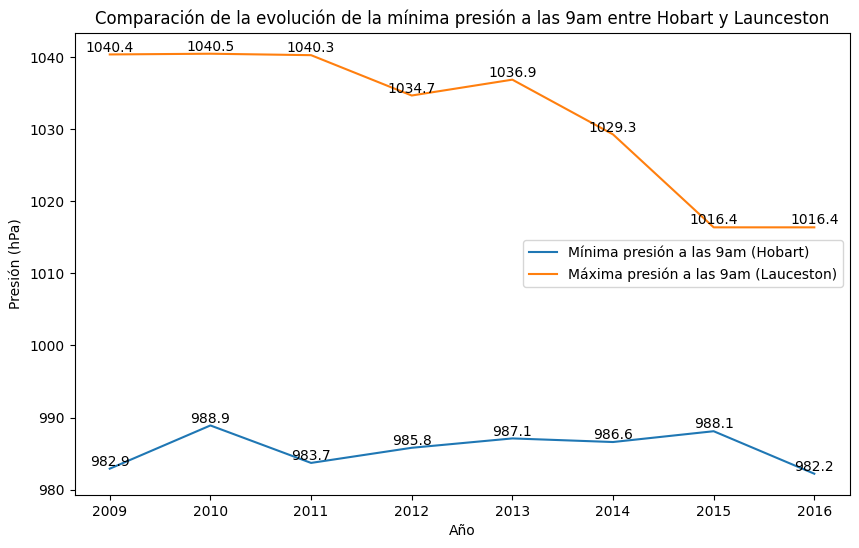

In [ ]:
# Grafico 2 - Minima presion en Hobart vs Maxima presion en Lauceston
df_hMinP = df_hobby.groupby(['Anio'])['Presion9am'].min()
df_hML = df_tas.groupby(['Anio'])['Presion9am'].max()

plt.figure(figsize=(10,6))

plt.plot(df_hMinP.index, df_hMinP.values, label='Mínima presión a las 9am (Hobart)')
plt.plot(df_hML.index, df_hML.values, label='Máxima presión a las 9am (Lauceston)')

for x, y in zip(df_hMinP.index, df_hMinP.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

for x, y in zip(df_hML.index, df_hML.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.title('Comparación de la evolución de la mínima presión a las 9am entre Hobart y Launceston')
plt.xlabel('Año')
plt.ylabel('Presión (hPa)')
plt.legend()

plt.show()


# Hipotesis

- Trabajar con hallazgo 2 y 3


- HALLAZGO 2: Durante altas presiones, mayores al promedio normal (1013hmmg) se generan temperaturas menores al promedio habitual en los meses en estudio.

- HALLAZGO 3: Durante altas presiones en la region de Lauceston, se espera que se produzcan rafajas de vientos bajas, esto se debe a la estabilidad del aire asociada con las altas presiones lo que limita la velocidad del viento en la superficie.

 Por otro lado se espera que en Hobart donde se producen presiones bajas, tambien se observen rafagas de vientos altas debido a que la presion alta de Laucenston produce presion baja en la ciudad vecina que es Hobart.

STATMODELS



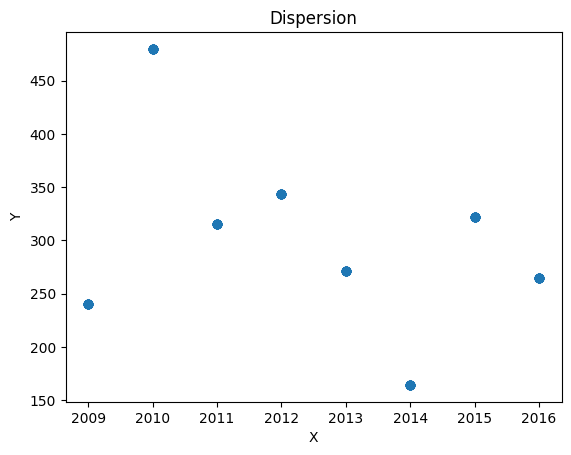

In [ ]:
#Hallazgo 1
from patsy import dmatrices
import statsmodels.api as sm

plt.scatter(df_Brisbane['Anio'], df_Brisbane['max_rainfall'])
plt.title('Dispersion')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [ ]:
y, X = dmatrices('max_rainfall ~ Anio', data = df_Brisbane, return_type ='dataframe')
y[:50]

,max_rainfall
0,240.8
1,240.8
2,240.8
3,240.8
4,240.8
5,240.8
6,240.8
7,240.8
8,240.8
9,240.8


In [ ]:
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:           max_rainfall   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     13.81
Date:                Fri, 12 May 2023   Prob (F-statistic):           0.000349
Time:                        00:26:20   Log-Likelihood:                -540.73
No. Observations:                  93   AIC:                             1085.
Df Residuals:                      91   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.768e+04   7367.969      3.757      0.0

eval_env: 1


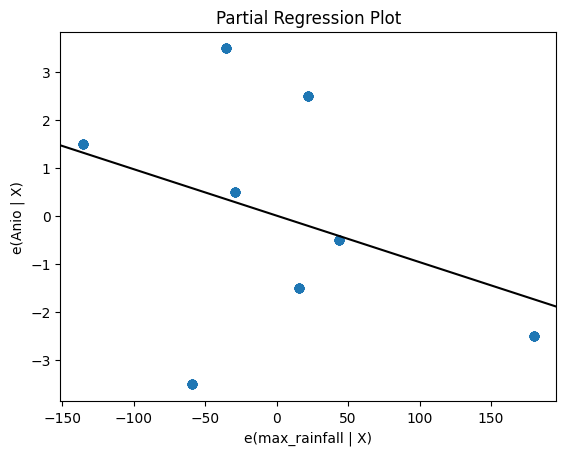

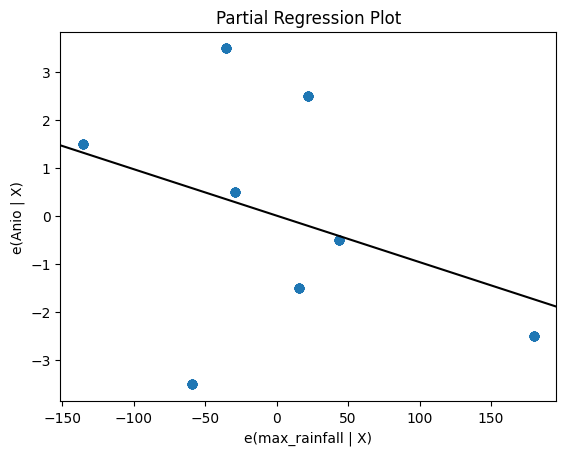

In [ ]:
sm.graphics.plot_partregress('Anio','max_rainfall',[], data = df_Brisbane, obs_labels = False)

In [ ]:
threshold = 0.5  # Umbral de correlación para considerarla alta
correlations_by_variable = {}

# Obtener las correlaciones para cada variable
for i in range(len(correlation_matrix.columns)):
    variable = correlation_matrix.columns[i]
    correlations = []

    for j in range(len(correlation_matrix.columns)):
        if i != j and abs(correlation_matrix.iloc[i, j]) > threshold:
            other_variable = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            correlations.append((other_variable, correlation_value))

    # Ordenar las correlaciones de mayor a menor
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)

    # Guardar las tres correlaciones más altas
    correlations_by_variable[variable] = correlations[:3]

# Imprimir las correlaciones por variable
for variable, correlations in correlations_by_variable.items():
    print(f"Correlaciones para {variable}:")
    for other_variable, correlation_value in correlations:
        print(f"{other_variable} = {correlation_value}")
    print()


NameError: ignored